In [8]:
# To call the programs stored in numpy library
import numpy as np # To change the terms into numerical values
# To call the programs stored in pandas library
import pandas as pd # it is used to read the datasets
# To call the programs in the matplotlib library
import matplotlib.pyplot as plt# to plotting the graphs
from matplotlib import style #importing style from the matplotlib library
plt.style.use(['dark_background'])#to tell about the plotting background
import seaborn as sns #command used to call the programs in seaborn library
sns.set(color_codes=True) # to tell the colour coding commands
from sklearn.model_selection import train_test_split #To define the modeling of data to sp
from sklearn.preprocessing import StandardScaler# it is to standardise the data properly
from sklearn.preprocessing import MinMaxScaler #importing MinMaxScaler function from sklea
from sklearn.neighbors import KNeighborsClassifier #importing knn function to call the pro
from sklearn import metrics # used to find the accuracy
from sklearn.metrics import confusion_matrix, accuracy_score ,mean_squared_error
from tqdm import tqdm_notebook # it is used to do for animation

In [9]:
df = pd.read_csv('Social_Network_Ads.csv') # reading the dataset


In [10]:
df #to check the dataset is uploaded

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [11]:
df.describe() #To show mathematical functions in a single dataset
#summarize the data

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [12]:
df.info()
# To check no.of columns,null and non-null values,checks datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [13]:
rows, col=df.shape #To show the shape of rows& columns
print("Rows : %s, column : %s" % (rows,col) )
# To tell no.of rows and no.of columns

Rows : 400, column : 5


In [14]:
print(df.columns) #To show the headings of the columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')


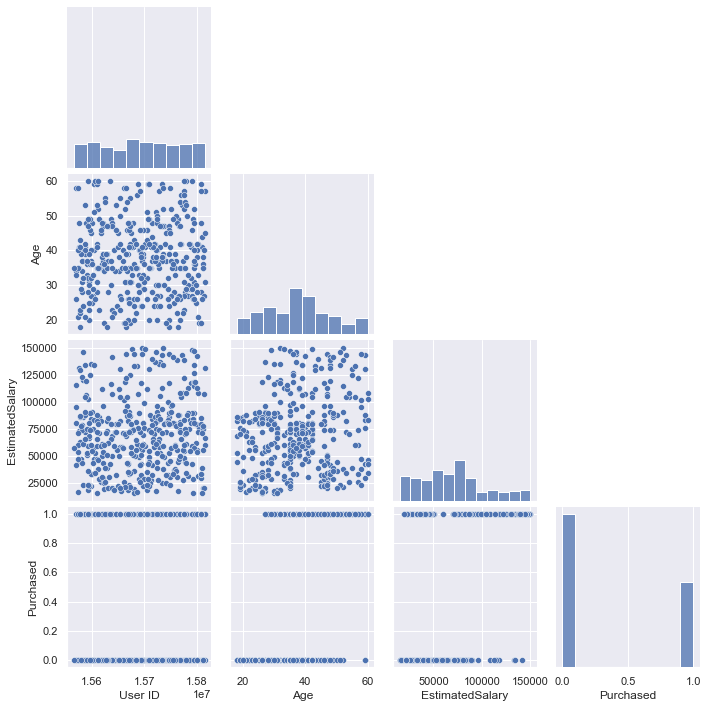

In [15]:
#To show the relationship between all the columns of the dataset
#sns is the command used to call the programs in seaborn library
sns.pairplot(df,corner=True)

In [16]:
#In the pairplot we didn't get the perfect relationship so we have to go for correlation
corr=df.corr()
print(corr)


                  User ID       Age  EstimatedSalary  Purchased
User ID          1.000000 -0.000721         0.071097   0.007120
Age             -0.000721  1.000000         0.155238   0.622454
EstimatedSalary  0.071097  0.155238         1.000000   0.362083
Purchased        0.007120  0.622454         0.362083   1.000000


<AxesSubplot:>

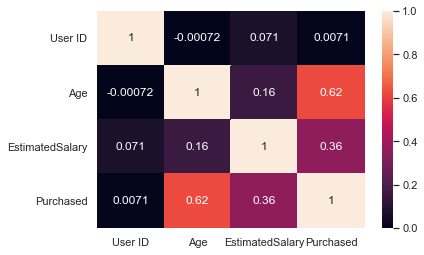

In [17]:
sns.heatmap(corr,annot=True)#for any correlation we have to use heatmap
#the dark coloured value columns are taken for prediction

In [18]:
df['Age'].value_counts()# To tell values of the age index in the columns

35    32
37    20
26    16
42    16
41    16
39    15
40    15
47    14
48    14
27    13
38    13
46    12
28    12
36    12
30    11
31    11
49    10
29    10
24     9
32     9
33     9
45     7
59     7
60     7
19     7
20     7
52     6
34     6
25     6
23     6
58     6
57     5
53     5
18     5
22     5
50     4
54     4
21     4
43     3
55     3
56     3
51     3
44     2
Name: Age, dtype: int64

In [20]:
#To define the indexes of the dataset properly
cdf = df[['User ID', 'Gender', 'Age', 'EstimatedSalary','Purchased']]


In [21]:
cdf.head(11) #it gives n-1 rows and columns of the datase

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [22]:
df['Purchased'].value_counts()# to show the counts of the values in purchased index and it


0    257
1    143
Name: Purchased, dtype: int64

In [23]:
df=df.dropna()#it is to remove the null values in the dataset

In [24]:
df.isnull().any()#it checks whether the columns have null values or not

User ID            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

In [25]:
df.shape #it tells order of the dataset

(400, 5)

In [26]:
X=df.iloc[:,0:4]#To give data of x-axis

In [27]:
X.head() #by default it take first 5 rows of all columns

,User ID,Gender,Age,EstimatedSalary
0,15624510,Male,19,19000
1,15810944,Male,35,20000
2,15668575,Female,26,43000
3,15603246,Female,27,57000
4,15804002,Male,19,76000


In [28]:
y=df.iloc[:,-1]# to predict y-axis data
y.head()#by default it takes first five rows of -2_estimatedsalary columns

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [29]:
#it used to change string values to numerical values then only machine will understand
X.Gender = X.Gender.map( {'Male' :0, 'Female':1} )

In [59]:
X.head()#by default it take first 5 rows of all columns


,User ID,Gender,Age,EstimatedSalary
0,15624510,0,19,19000
1,15810944,0,35,20000
2,15668575,1,26,43000
3,15603246,1,27,57000
4,15804002,0,19,76000


In [71]:
# Splitting the dataset into training and test set, modeling the dataset
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state=0)
#To refine the data properly, instead of multiple values it will change to standard values
# it will set the range of the dataset then we will train tne data easily
st_x = StandardScaler()
X_train= st_x.fit_transform(X_train)# To standardise the training data
X_test= st_x.transform(X_test) #To standardise the testing data
#scaler = MinMaxScaler()
#X_train= scaler.fit_transform(X_train)
#X_test= scaler.fit_transform(X_test)

In [72]:
Training_Accuracy=[]# to check training accuracy
Testing_Accuracy=[] # to check testing accuracy
model=[]# to check model of the dataset

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics #is to find the accuracy of the data
logreg = LogisticRegression()

In [77]:
#fit function is used to train the data
logreg.fit(X_train, y_train)#applying training to the logistic regression

LogisticRegression()

In [78]:
x_pred = logreg.predict(X_train)# To show the x prediction
y_pred = logreg.predict(X_test) # To show the y prediction
Training_Accuracy.append(metrics.accuracy_score(y_train, x_pred))# gives the accuracy of training
Testing_Accuracy.append(metrics.accuracy_score(y_test, y_pred)) # to give accuracy of the testing
model.append('LogisticRegression')# applying modeling to the logistic regression
print("Training Accuracy:",metrics.accuracy_score(y_train, x_pred))#metrics&score is to find training accuracy
print("Testing Accuracy:",metrics.accuracy_score(y_test, y_pred))


Training Accuracy: 0.8333333333333334
Testing Accuracy: 0.9


In [79]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print("##################################################################")
print(classification_report(y_test, y_pred))

[[66  2]
 [ 8 24]]
##################################################################
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        68
           1       0.92      0.75      0.83        32

    accuracy                           0.90       100
   macro avg       0.91      0.86      0.88       100
weighted avg       0.90      0.90      0.90       100



In [80]:
from sklearn.neighbors import KNeighborsClassifier
#importing KNeighborsClassifier from sklearn
knn = KNeighborsClassifier(n_neighbors=5)#giving value to knn
knn.fit(X_train, y_train)#fit function will train the dataset


KNeighborsClassifier()

In [81]:
x_pred = knn.predict(X_train)#predecting the value of x
y_pred = knn.predict(X_test)#predecting the value of y
Training_Accuracy.append(metrics.accuracy_score(y_train, x_pred))#it will give the accuracy
Testing_Accuracy.append(metrics.accuracy_score(y_test, y_pred))#it will give the testing accuracy
model.append('KNeighbors')# modeling the kneighbour
print("Training Accuracy:",metrics.accuracy_score(y_train, x_pred))#it will print training accuracy 
print("Testing Accuracy:",metrics.accuracy_score(y_test, y_pred))#it will print testing accuracy


Training Accuracy: 0.92
Testing Accuracy: 0.93


In [82]:
from sklearn.metrics import confusion_matrix,classification_report
#importing confusion matrix and classification report
confusion_matrix = confusion_matrix(y_test, y_pred)#giving value to confusion matrix
print(confusion_matrix)#it will print confusion matrix
print("##################################################################")
print(classification_report(y_test, y_pred))#it will print classification report

[[65  3]
 [ 4 28]]
##################################################################
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        68
           1       0.90      0.88      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



In [83]:
from sklearn.tree import DecisionTreeClassifier# importing decision tree algrothim from sklearn
#decision tree algrothim is stored in this variable
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)#applying algrothim to the trained x and y data


DecisionTreeClassifier()

In [87]:
y_pred = classifier.predict(X_test)##to predict new y value have to predict x testing value
x_pred = classifier.predict(X_train)#to predict x value we have to predict x training value
Training_Accuracy.append(metrics.accuracy_score(y_train, x_pred))#to check the training accuracy
Testing_Accuracy.append(metrics.accuracy_score(y_test, y_pred))#to check the testing accuracy
model.append('DecisionTree Classification')#applying modeling to the decision tree algorithm
print("Training Accuracy:",metrics.accuracy_score(y_train, x_pred))#to check the accuracy
print("Testing Accuracy:",metrics.accuracy_score(y_test, y_pred))#to check the accuracy score


Training Accuracy: 1.0
Testing Accuracy: 0.89


In [88]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix = confusion_matrix(y_test, y_pred)#assiging confusion matrix to the data
print(confusion_matrix)#it tells accuracy in the form of true+,false+,true-, false-.
print("##################################################################")
print(classification_report(y_test, y_pred))
#to show the proper classification of the testing data

[[63  5]
 [ 6 26]]
##################################################################
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        68
           1       0.84      0.81      0.83        32

    accuracy                           0.89       100
   macro avg       0.88      0.87      0.87       100
weighted avg       0.89      0.89      0.89       100



In [90]:

#importing random forest from the sklearn library
from sklearn.ensemble import RandomForestClassifier
#random forest algorithm is stored in the variable
clf=RandomForestClassifier(n_estimators=100)#estimors tells total no.of decision trees
clf.fit(X_train,y_train)#appling algorithm to the trained data

RandomForestClassifier()

In [92]:
y_pred=clf.predict(X_test)#to predict new y value have to predict x test
x_pred=clf.predict(X_train)#to predict x value we have to predict x train
Training_Accuracy.append(metrics.accuracy_score(y_train, x_pred))#to check the training accuracy
Testing_Accuracy.append(metrics.accuracy_score(y_test, y_pred))#to check the testing accuracy
model.append('RandomForest')#applying modeling to the random forest algrothim
print("Training Accuracy:",metrics.accuracy_score(y_train, x_pred))#to predict accuracy of training
print("Testing Accuracy:" ,metrics.accuracy_score(y_test,y_pred))#to predict accuracy score

Training Accuracy: 1.0
Testing Accuracy: 0.94


In [106]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix = confusion_matrix(y_test, y_pred)#assiging confusion matrix to the data
print(confusion_matrix)#it tells accuracy in the form of true+,false+,true-, false-.
print("##################################################################")
print(classification_report(y_test, y_pred))#it tells proper classification of the data

[[64  4]
 [ 2 30]]
##################################################################
              precision    recall  f1-score   support

           0       0.97      0.94      0.96        68
           1       0.88      0.94      0.91        32

    accuracy                           0.94       100
   macro avg       0.93      0.94      0.93       100
weighted avg       0.94      0.94      0.94       100



In [107]:
dataset = pd.read_csv('Social_Network_Ads.csv')# to read the dataset
X = dataset.iloc[:, [2,3]].values #assigning x columns (all rows,2&3columns)
dataset#prints the output of dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [111]:
#applying algorithm-kmeans is used to predict the output values
from sklearn.cluster import KMeans# importing k-means algorithm from sklearn
wcss = [] # no y values, it's an a empty file
for i in range(1, 11):# range is given on the basis of x data
#k means++ avoiding random errors where we have to place a random point at the initial p
 Kmeans= KMeans(n_clusters = i, init = 'k-means++', random_state = 42)#each cluster
Kmeans.fit(X)#applying algorithm to the trained x data
wcss.append(kmeans.inertia_) # to calculate see(sum of square error)values
plt.plot(range(1, 11), wcss, color='purple') # plotting the graph between x data and y dat
plt.title('The Elbow Method') # elbow technique is used to find no. Of used good for data
plt.xlabel('Number of clusters') # naming of the x-axis
plt.ylabel('WCSS')#labeling the y axis
plt.show()#plotting the graph


NameError: name 'kmeans' is not defined